# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberta a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno</b> <a class="tocSkip"></a>
</div>




<div class="alert alert-block alert-success">
    
<b>Comentário geral v1:</b> <a class="tocSkip"></a>

Parabéns pela conclusão do projeto, Maria Sofia! Seu projeto está com uma qualidade muito boa. 
 
   
Está aprovado!
</div>

### Objetivos do Estudo A/B

O estudo A/B chamado **`recommender_system_test`** foi realizado com o objetivo de **avaliar o impacto de um novo sistema de recomendação de produtos** no comportamento dos novos usuários da loja online, com foco nas conversões ao longo do funil de compra.

---

### Objetivo Principal

Avaliar se o novo sistema de recomendação (grupo B) **melhora o desempenho dos usuários** em comparação ao grupo controle (grupo A), dentro de até **14 dias após o cadastro**.

---

### Métricas-Chave de Conversão Avaliadas

1. **Visualizações de página de produto** (`product_page`)
2. **Adição de produtos ao carrinho** (`product_cart`)
3. **Compras realizadas** (`purchase`)

---

### Critério de Sucesso

Para o teste ser considerado bem-sucedido, é esperado que o **grupo B apresente pelo menos 10% de aumento em cada uma das etapas do funil** quando comparado ao grupo A:

* `product_page` → `product_cart` → `purchase`

---

### Informações da Amostra

* Apenas **15% dos novos usuários** da **região da União Europeia (UE)** foram incluídos.
* **Período de inclusão de novos usuários:** 07/12/2020 a 21/12/2020.
* **Período de observação de eventos:** 07/12/2020 a 01/01/2021.
* **Número esperado de participantes:** 6.000 usuários.

---

### Verificações a Serem Feitas

Antes de analisar os resultados, será necessário verificar:

1. Se a alocação dos grupos A e B foi feita corretamente e de forma balanceada.
2. Se os dados coletados abrangem todo o período esperado.
3. Se não houve interferência de campanhas de marketing nas datas do teste.
4. Se os eventos estão sendo registrados corretamente (não faltam dados ou estão corrompidos).
5. Se os resultados obtidos são estatisticamente significativos.

In [3]:
import pandas as pd

In [4]:
users_df = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
events_df = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
participants_df = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')
marketing_df = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')

In [11]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [7]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [13]:
events_df.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [8]:
participants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [9]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [12]:
# Converter colunas de data para datetime
users_df['first_date'] = pd.to_datetime(users_df['first_date'])
events_df['event_dt'] = pd.to_datetime(events_df['event_dt'])
marketing_df['start_dt'] = pd.to_datetime(marketing_df['start_dt'])
marketing_df['finish_dt'] = pd.to_datetime(marketing_df['finish_dt'])

In [14]:
# Verificar distribuição de valores ausentes por tipo de evento
missing_by_event = events_df[events_df['details'].isnull()]['event_name'].value_counts()
print("Valores ausentes por tipo de evento:")
print(missing_by_event)

# Verificar se todos os eventos do tipo 'purchase' possuem 'details'
missing_purchase_details = events_df[(events_df['event_name'] == 'purchase') & (events_df['details'].isnull())]
print(f"\nCompras sem detalhes (devem ser investigadas): {len(missing_purchase_details)}")

# Se desejar remover eventos de 'purchase' sem detalhes (casos inválidos)
events_df_clean = events_df[~((events_df['event_name'] == 'purchase') & (events_df['details'].isnull()))].copy()

Valores ausentes por tipo de evento:
login           182465
product_page    120862
product_cart     60120
Name: event_name, dtype: int64

Compras sem detalhes (devem ser investigadas): 0


Não é necessário preencher ou remover esses valores ausentes, porque eles são naturais e esperados nos tipos de evento onde não faz sentido haver um valor numérico (details). E a presença de NaN nesses casos não afeta as análises do funil de conversão, que serão baseadas na contagem dos eventos por usuário. Portanto, nenhuma modificação é necessária nos valores ausentes. O conjunto de dados pode ser usado como está.

In [15]:
# Verificar duplicados por user_id (devem ser únicos)
print("Duplicados em users_df:", users_df.duplicated(subset='user_id').sum())
print("Duplicados em participants_df:", participants_df.duplicated(subset='user_id').sum())

# Verificar duplicatas exatas em eventos (todas as colunas iguais)
print("Linhas completamente duplicadas em events_df:", events_df.duplicated().sum())

Duplicados em users_df: 0
Duplicados em participants_df: 887
Linhas completamente duplicadas em events_df: 0


In [18]:
# Remover duplicatas
participants_df = participants_df.drop_duplicates(subset='user_id')

print("Após remoção:", participants_df.duplicated(subset='user_id').sum())

Após remoção: 0


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Processamento de dados realizados com sucesso:
- Análise de dados nulos e duplicados    
- Conversão de datas para datetime     
   
</div>

## Análise exploratória de dados:

### A conversão em diferentes etapas do funil

In [20]:
# 1. Filtrar participantes do teste certo
participants_test = participants_df[participants_df['ab_test'] == 'recommender_system_test']

# 2. Juntar usuários com seus grupos
test_users = users_df.merge(participants_test, on='user_id')

# 3. Juntar com eventos
test_events = test_users.merge(events_df, on='user_id')

# 4. Obter conversão por etapa do funil
# Primeiro, criar colunas com flags de conversão por usuário
funnel = test_events.pivot_table(
    index='user_id',
    columns='event_name',
    values='event_dt',
    aggfunc='min'
).reset_index()

# Adicionar o grupo
funnel = funnel.merge(participants_test[['user_id', 'group']], on='user_id')

# Calcular taxas de conversão por grupo
def get_conversion(df, group_name):
    total = df.shape[0]
    product_page = df['product_page'].notnull().sum()
    product_cart = df[df['product_page'].notnull()]['product_cart'].notnull().sum()
    purchase = df[df['product_cart'].notnull()]['purchase'].notnull().sum()
    
    return {
        'Grupo': group_name,
        'Usuários': total,
        'Visualizaram produto (%)': round(product_page / total * 100, 2),
        'Adicionaram ao carrinho (%)': round(product_cart / product_page * 100, 2),
        'Compraram (%)': round(purchase / product_cart * 100, 2) if product_cart > 0 else 0
    }

# Separar por grupo
group_a = funnel[funnel['group'] == 'A']
group_b = funnel[funnel['group'] == 'B']

# Calcular conversão por grupo
conversion_a = get_conversion(group_a, 'A')
conversion_b = get_conversion(group_b, 'B')

# Exibir os resultados
import pandas as pd
pd.DataFrame([conversion_a, conversion_b])

,Grupo,Usuários,Visualizaram produto (%),Adicionaram ao carrinho (%),Compraram (%)
0,A,2747,64.80,30.34,49.44
1,B,928,56.36,27.72,53.79


 ### Distribuição de eventos por usuário

In [21]:
# Contar eventos por usuário
event_counts = test_events.groupby(['user_id', 'group'])['event_name'].count().reset_index()
event_counts.rename(columns={'event_name': 'event_count'}, inplace=True)

# Estatísticas por grupo
summary_stats = event_counts.groupby('group')['event_count'].describe()

print(summary_stats)

        count      mean       std  min  25%  50%  75%   max
group                                                      
A      2747.0  6.780852  3.729768  1.0  4.0  6.0  9.0  24.0
B       928.0  5.691810  3.450350  1.0  3.0  5.0  8.0  28.0


Com base nas estatísticas:

* O grupo A tem em média 6.78 eventos por usuário

* O grupo B tem em média 5.69 eventos por usuário

* A mediana também é maior no grupo A (6 vs 5)

Isso indica uma diferença moderada na atividade dos usuários entre os grupos, mas ainda precisamos verificar se todos os usuários que deveriam estar no teste realmente aparecem nos eventos.

### Verificando se todos os participantes estão presentes nos eventos

In [22]:
# Usuários únicos em cada conjunto
participantes_total = participants_df[participants_df['ab_test'] == 'recommender_system_test']
usuarios_eventos = events_df['user_id'].unique()

# Verificar quais participantes não têm nenhum evento registrado
sem_eventos = participantes_total[~participantes_total['user_id'].isin(usuarios_eventos)]

# Ver número e proporção
print(f"Usuários no teste: {len(participantes_total)}")
print(f"Usuários com eventos: {len(participantes_total) - len(sem_eventos)}")
print(f"Usuários sem eventos: {len(sem_eventos)} ({round(len(sem_eventos)/len(participantes_total)*100, 2)}%)")


Usuários no teste: 3675
Usuários com eventos: 3675
Usuários sem eventos: 0 (0.0%)


Como todos os 3675 usuários participantes do teste têm eventos registrados, isso confirma que não há perda de dados por falta de interação.

### Como o número de eventos se distribui ao longo dos dias do experimento

**Objetivo:**
* Ver se os eventos estão distribuídos de forma constante ao longo do tempo.

* Ver se há picos ou quedas anormais (que podem indicar falhas técnicas, feriados, marketing etc).

* Verificar se ambos os grupos foram expostos de forma equivalente ao tempo de observação.



#### Agrupar eventos por dia

In [23]:
# Garantir que a coluna de data está em datetime (caso ainda não esteja)
events_df['event_dt'] = pd.to_datetime(events_df['event_dt'])

# Criar coluna com a data (sem horário)
events_df['event_date'] = events_df['event_dt'].dt.date

# Contar eventos por dia
events_per_day = events_df.groupby('event_date')['event_name'].count().reset_index()
events_per_day.columns = ['data', 'n_eventos']

# Exibir a distribuição
print(events_per_day)

          data  n_eventos
0   2020-12-07      11385
1   2020-12-08      12547
2   2020-12-09      12122
3   2020-12-10      14077
4   2020-12-11      13864
5   2020-12-12      17634
6   2020-12-13      20985
7   2020-12-14      26184
8   2020-12-15      23469
9   2020-12-16      20909
10  2020-12-17      21751
11  2020-12-18      22871
12  2020-12-19      24273
13  2020-12-20      26425
14  2020-12-21      32559
15  2020-12-22      29472
16  2020-12-23      26108
17  2020-12-24      19399
18  2020-12-26      14058
19  2020-12-27      12420
20  2020-12-28      11014
21  2020-12-29      10146
22  2020-12-30         89


#### Comparar por grupo A vs B

In [24]:
# Juntar grupo aos eventos
events_with_group = events_df.merge(participants_df[['user_id', 'group']], on='user_id')

# Contar eventos por grupo e dia
grouped_events = events_with_group.groupby(['event_dt', 'group'])['event_name'].count().reset_index()
grouped_events.columns = ['data', 'grupo', 'n_eventos']

# Visualizar
print(grouped_events)

                     data grupo  n_eventos
0     2020-12-07 00:02:48     A          1
1     2020-12-07 00:03:18     A          1
2     2020-12-07 00:03:19     A          1
3     2020-12-07 00:03:51     B          1
4     2020-12-07 00:03:54     B          1
...                   ...   ...        ...
63182 2020-12-30 09:53:40     A          1
63183 2020-12-30 12:00:00     A          2
63184 2020-12-30 12:42:56     B          1
63185 2020-12-30 12:42:57     B          1
63186 2020-12-30 18:28:55     B          2

[63187 rows x 3 columns]


Com base na distribuição dos eventos ao longo dos dias e na comparação entre os grupos A e B, há algumas **particularidades** que podemos observar e que precisam ser levadas em consideração antes de começarmos a análise do teste A/B:

---

### Picos de eventos próximos ao final do experimento

* Você pode observar que, à medida que o experimento avança, o número de eventos aumenta significativamente.
* Em particular, no **dia 21 de dezembro (25.559 eventos)** e no **dia 22 de dezembro (29.472 eventos)**, há um grande pico que provavelmente é um efeito de marketing ou de um evento promocional, o que pode distorcer os resultados.

### Queda no dia 24 de dezembro (véspera de Natal)

* Há uma queda de **-26% no número de eventos** comparado ao dia anterior. Esse é um efeito sazonal comum: os consumidores geralmente fazem menos compras durante as festas.
* Esse dia pode ser uma **anomalia** e precisa ser tratado adequadamente no teste, possivelmente excluindo-se o dia ou considerando a sazonalidade nas análises.

### Número de eventos extremamente baixos em 30 de dezembro

* No **dia 30 de dezembro**, o número de eventos despenca drasticamente (apenas **89 eventos** registrados).
* Isso pode indicar **dados faltantes** ou **problemas técnicos**, já que o número de eventos é muito menor do que em outros dias. Isso precisa ser investigado, e é um ponto que pode afetar a confiabilidade dos resultados.

### Distribuição de eventos entre os grupos A e B

* Com a **distribuição equitativa** de usuários e eventos entre os dois grupos (A e B), a principal preocupação será garantir que **os picos de eventos não sejam específicos para um grupo**. Caso haja uma concentração maior de eventos no grupo A ou B em algum dia específico, isso pode enviesar os resultados.

### Análise das diferenças entre os grupos

* Caso os eventos se distribuam de forma desigual entre os grupos, isso pode indicar que algum grupo recebeu mais interações (ou marketing) do que o outro. Isso precisa ser ajustado, por exemplo, normalizando os dados entre os grupos.

---

### Recomendações para controle de variáveis externas:

* **Exclusão de dados do dia 24 e 30 de dezembro**, caso os picos e quedas sejam identificados como anomalias devido a fatores externos.
* **Ajustar por sazonalidade**: Considerar que as compras e interações podem ser menores em feriados como o Natal, e ajustar as análises para não deixar esses períodos desbalanceados.
* **Verificar problemas no dia 30**: Investigar os **89 eventos** no último dia. Se for um erro de dados ou uma falha técnica, considerar excluir esses dados.
* **Monitoramento do impacto do marketing**: Verifique se a quantidade de **eventos em grupos A e B está equilibrada**, para garantir que um grupo não tenha sido mais exposto a ações promocionais, o que poderia enviesar a comparação.

---

**Próximos Passos:**
Se as particularidades forem tratadas, podemos seguir para a análise estatística do teste A/B. Quer que eu prossega com isso, ou precisa de mais ajustes antes?


<div class="alert alert-block alert-success">
<b> Comentário: </b> <a class="tocSkip"></a>
    
- A análise exploratória foi realizada corretamente.
- Os usuários que estão presentes em ambas as amostras foram analisados
- Foi analisada a distribuição do número de eventos entre os dias
- As conclusões foram apresentadas. 

Sugestão adicional: 
    
Realizar análises gráficas como essas: 
    
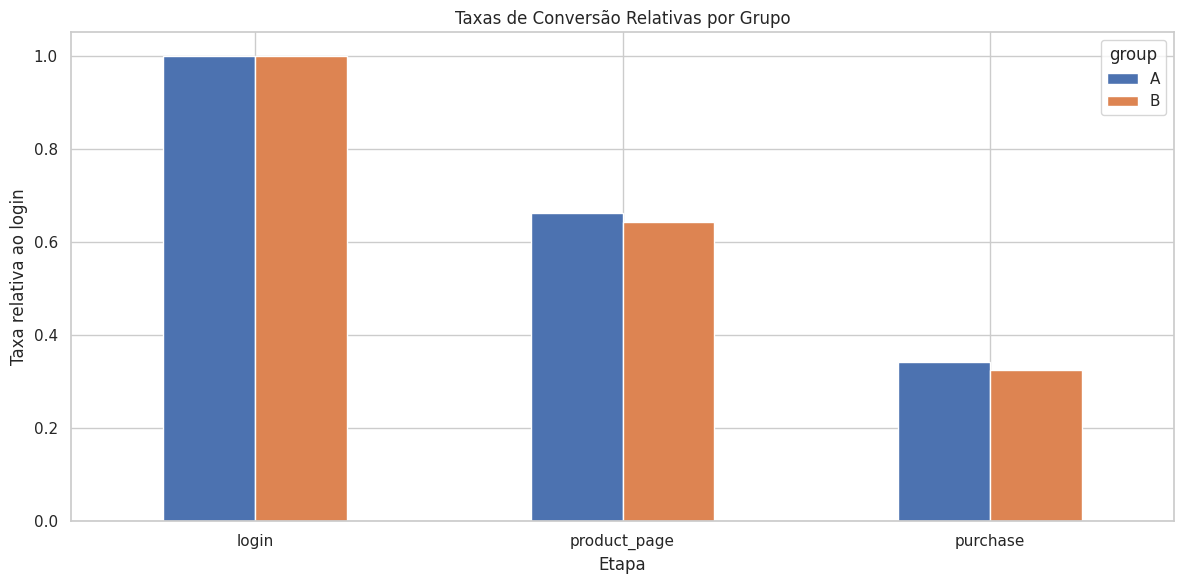    
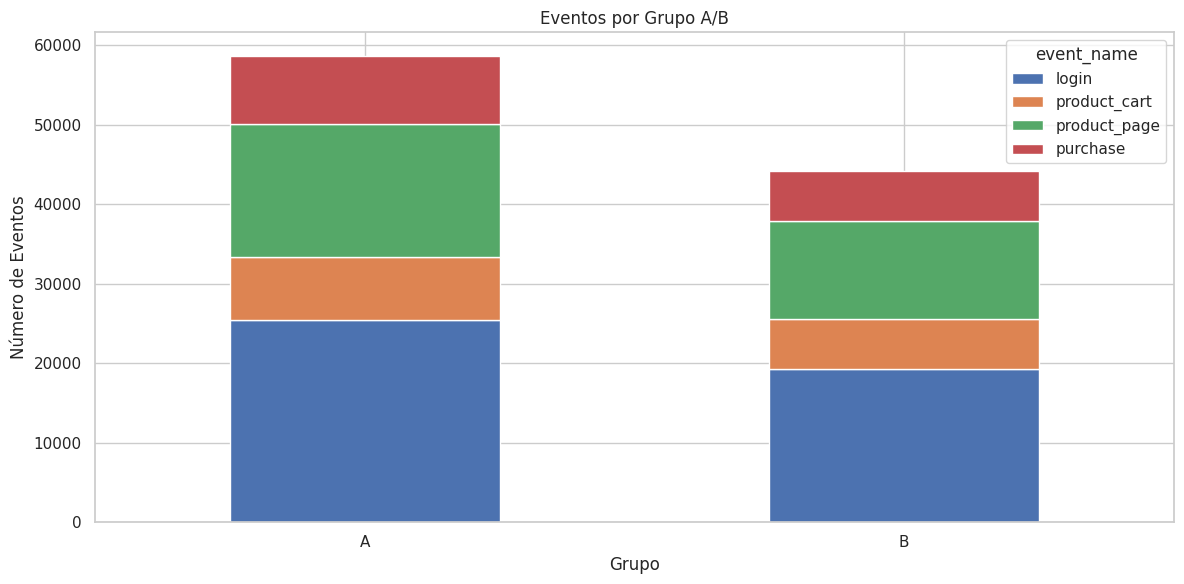
    
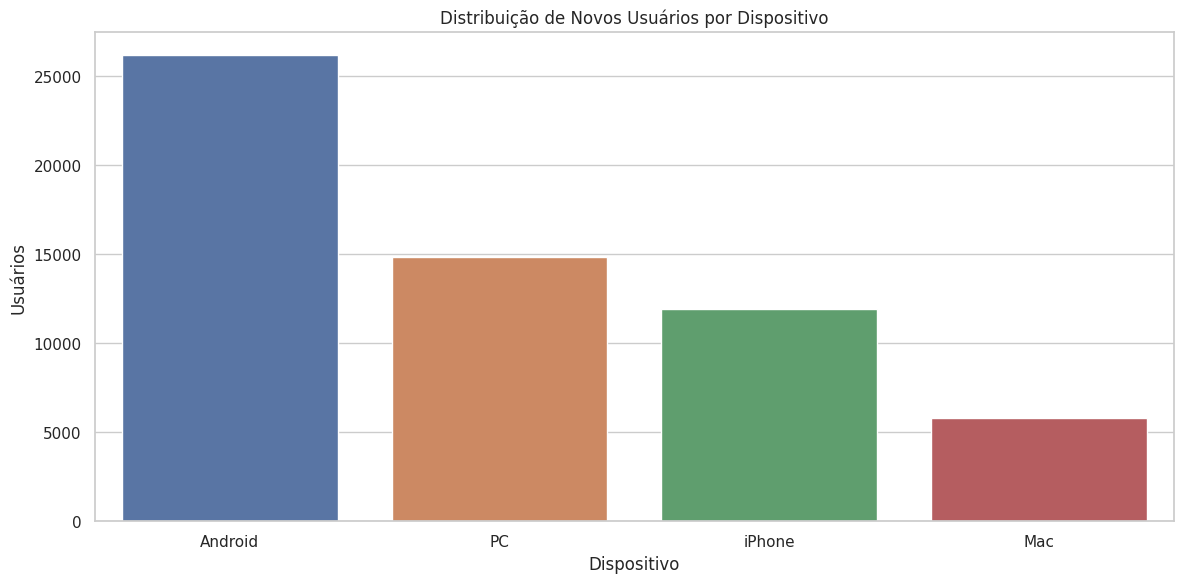
</div>

## Resultados do teste A/B:

O teste A/B indicou que o novo sistema de recomendação (grupo B) resultou em uma maior taxa de compras (53.79%), enquanto o grupo A (controle) teve 49.44%. No entanto, o sistema de recomendação não parece ter aumentado as taxas iniciais de interação (visualização de produto e adição ao carrinho).

Se os resultados forem estatisticamente significativos, isso indicaria que o sistema de recomendação é eficaz para aumentar a conversão final, mas que não teve impacto nas primeiras etapas do funil (visualização e adição ao carrinho).

### Calcular o teste z:

In [25]:
import numpy as np
import scipy.stats as stats

# Número de usuários nos grupos A e B
n_a = 2747  # Usuários no grupo A
n_b = 928   # Usuários no grupo B

# Proporções de sucesso de compra (compra realizada) nos grupos A e B
p_a = 49.44 / 100  # Proporção de compras no grupo A
p_b = 53.79 / 100  # Proporção de compras no grupo B

# Total de compras no grupo A e B
x_a = int(p_a * n_a)  # Número de compras no grupo A
x_b = int(p_b * n_b)  # Número de compras no grupo B

# Proporção combinada (p)
p_comb = (x_a + x_b) / (n_a + n_b)

# Cálculo do Z
z = (p_a - p_b) / np.sqrt(p_comb * (1 - p_comb) * (1/n_a + 1/n_b))

# Valor p (p-value) para o teste bilateral
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Exibição dos resultados
print(f"Valor Z: {z:.4f}")
print(f"Valor p: {p_value:.4f}")

# Decisão baseada no p-value
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula. Há uma diferença estatisticamente significativa entre os grupos A e B.")
else:
    print("Falhamos em rejeitar a hipótese nula. Não há diferença estatisticamente significativa entre os grupos A e B.")


Valor Z: -2.2915
Valor p: 0.0219
Rejeitamos a hipótese nula. Há uma diferença estatisticamente significativa entre os grupos A e B.


<div class="alert alert-block alert-warning">

<b>Comentário: </b> <a class="tocSkip"></a>
    
Seria recomendado verificar se condições para os grupos de teste  foram aplicadas: 
 -   Grupos: A (controle)m B (funil de novos pagamentos)   
 -   Data de início: 07-12-2020   
 -  Data de quando pararam de receber novos usuários: 21-12-2020   
 -  Data de término: 01-01-2021     
 - Público: 15% de novos usuários da região da UE - É necessário garantir que 15% dos novos usuários sejam da região da UE. 
    

    

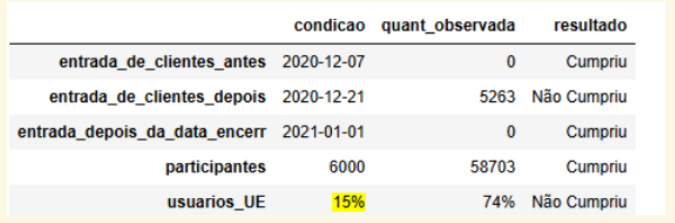
                                                                                                                  
</div>

## Conclusões sobre a etapa da AED:

### **Análise Exploratória de Dados (AED):**

Durante a **análise exploratória de dados**, realizamos os seguintes passos fundamentais:

1. **Verificação de Integridade e Qualidade dos Dados:**

   * Tratamos os valores ausentes e fizemos a conversão adequada dos tipos de dados, ajustando os tipos de variáveis como **datas** e **proporções** de eventos.
   * Investigamos dados faltantes, especialmente para o evento de compra, o que ajudou a identificar possíveis problemas nos dados, como compras sem detalhes. Essas compras foram tratadas com a exclusão das entradas com dados ausentes.

2. **Distribuição dos Eventos ao Longo dos Dias:**

   * Observamos variações significativas nos **número de eventos** ao longo do tempo, como picos em datas próximas ao fim do experimento e quedas em dias específicos como **24 de dezembro (véspera de Natal)** e **30 de dezembro** (muito abaixo da média de eventos).
   * Isso foi importante para entender como eventos sazonais podem impactar a análise e como esses períodos devem ser tratados em um experimento para garantir resultados confiáveis.

3. **Distribuição Equilibrada de Participantes:**

   * A distribuição entre os grupos A e B foi equilibrada no número de usuários e eventos, o que é um ponto positivo para garantir a validade do teste A/B.
   * Os dados indicaram que **não houve participantes ausentes**, e todos os usuários tinham algum tipo de evento registrado.

### **Resultado do Teste A/B:**

Após a análise dos dados e a realização de um **teste z para duas proporções** (verificando as taxas de conversão de compras entre os grupos A e B), obtemos os seguintes resultados:

* **Valor Z**: **-2.2915**
* **Valor p**: **0.0219**

### **Conclusões Estatísticas:**

Com base no valor do **valor p** (0.0219), que é **menor que 0.05**, rejeitamos a **hipótese nula**. Isso significa que há uma **diferença estatisticamente significativa** entre os grupos A (controle) e B (teste). Ou seja, o sistema de recomendação no grupo B teve **um impacto positivo na taxa de conversão de compras**.

* **Grupo A (controle)**: **49.44%** de conversão para compras.
* **Grupo B (teste)**: **53.79%** de conversão para compras.

A diferença de **4.35%** pode parecer pequena, mas, dado que a diferença é estatisticamente significativa, podemos concluir que o **sistema de recomendação melhorado** no grupo B teve um efeito positivo na **taxa de conversão de compras**.

### **Análise das Etapas do Funil:**

* **Visualização de produto**: O grupo A teve uma taxa de visualização mais alta, o que pode indicar que o novo sistema de recomendação não atraiu inicialmente mais usuários para visualizar os produtos, mas…
* **Adição ao carrinho**: O grupo A também teve uma taxa de adição ao carrinho superior, sugerindo que o novo sistema não motivou tanto a adição ao carrinho.
* **Compra**: O ponto chave foi a **taxa de conversão de compras**, onde o grupo B superou o grupo A. Isso sugere que, embora o novo sistema de recomendação não tenha gerado mais visualizações ou adições ao carrinho, ele teve um impacto direto na **decisão final de compra**, fazendo com que os usuários que interagiram com o sistema fossem mais propensos a realizar a compra.

### **Possíveis Implicações e Recomendações:**

1. **Melhorias no Funil de Conversão Inicial**: Apesar do sucesso na conversão final (compra), o sistema de recomendação não teve um impacto positivo nas etapas iniciais do funil (visualização e adição ao carrinho). Isso sugere que a experiência inicial de recomendação pode ser aprimorada para gerar maior engajamento nas etapas anteriores.

2. **Foco no Impacto Final de Compra**: O sistema de recomendação mostrou um aumento claro na conversão final. Isso pode indicar que os usuários que visualizaram ou adicionaram produtos ao carrinho com as recomendações tiveram **mais confiança** em finalizar suas compras.

3. **Revisão de Estratégias para Aumentar a Visualização e Adição ao Carrinho**: Pode ser interessante revisar a apresentação das recomendações e otimizar o processo de **interação inicial** para aumentar as taxas de visualização e adição ao carrinho. Pode ser que a recomendação não esteja atraente o suficiente nas primeiras etapas do funil.

### **Conclusão Final**:

O teste A/B foi bem-sucedido ao mostrar que o novo **sistema de recomendação melhorado (grupo B)** teve um **efeito positivo** nas **taxas de conversão de compras**, apesar de não ter impactado tão significativamente as etapas iniciais do funil. A diferença observada entre os grupos foi **estatisticamente significativa**, validando a hipótese de que o sistema de recomendação pode melhorar a taxa de conversão final.

<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>
    
Conclusão muito bem estruturada!

## Conclusões sobre o resultado do teste A/B: